# Cancer detection with logistic regression

## 1)-Data Loading

In [ ]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('/content/Cancerdata.csv')

## 2)-Data description/exploration and cleaning

### 2.1-Data description

We extract a sample of the data frame to see how is composed.

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We chech de data frame information to check the types of variables with wich we are dealing with and see if apriori there are useless variables for our classification problem.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


###3)-Data manipulation

####3.1-Data filtering

We can see that the last column is full of NaN objects, then we eliminate this information. Also we do not need the ID information.

In [ ]:
df.drop('Unnamed: 32',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We eliminate the duplicates

In [ ]:
df.drop_duplicates(inplace=True)

We check if there are null values.

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

####3.2-Data Featurization

We want to classify the tumors as benign or malign, then we check if the variable "diagnosis" has only two classes, and if so, we use one-hot-encoding for the variable "diagnosis".

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'].replace(to_replace="M",value=1,inplace=True)
df['diagnosis'].replace(to_replace="B",value=0,inplace=True)

####3.4-Data subsampling

We first check if the data is balanced

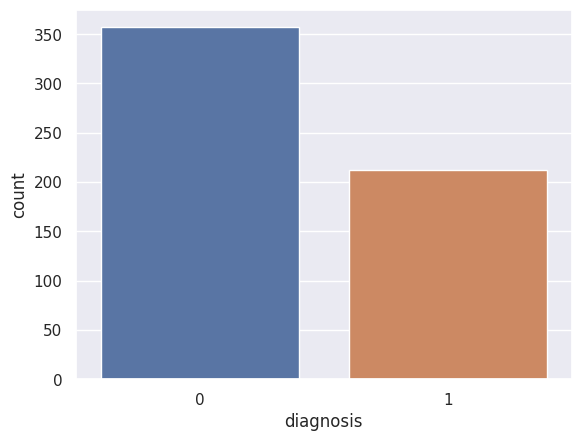

In [ ]:
sns.countplot(data=df,x='diagnosis')
plt.show()

Because the data is unbalanced, we have to make a subsampling of the data by taking as much data as the size of the smallest class.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [ ]:
X = df.drop('diagnosis',axis=1)
y = df.diagnosis

In [ ]:
X_over , y_over = undersample.fit_resample(X,y)

In [ ]:
X_over.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
1,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
2,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
3,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
4,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343


In [ ]:
y_over

0      0
1      0
2      0
3      0
4      0
      ..
419    1
420    1
421    1
422    1
423    1
Name: diagnosis, Length: 424, dtype: int64

In [ ]:
pd.DataFrame(y_over).head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


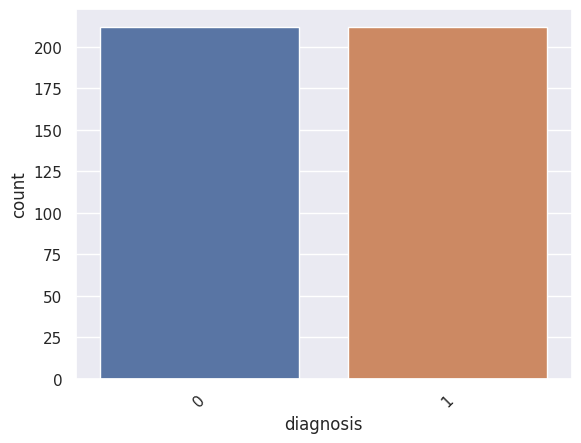

In [ ]:
sns.countplot(data=pd.DataFrame(y_over),x="diagnosis")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.shape

(569, 31)

In [ ]:
X_over.shape

(424, 30)

##4)-Data analysis and correlations

###4.1-Variable correlations

We check if other variables rather than diagnosis exhibits high correlation among them, if so, we discard these variables as they can affect the performance of my model.

First, we reconstruct the data set using the sumbsampled datasets.

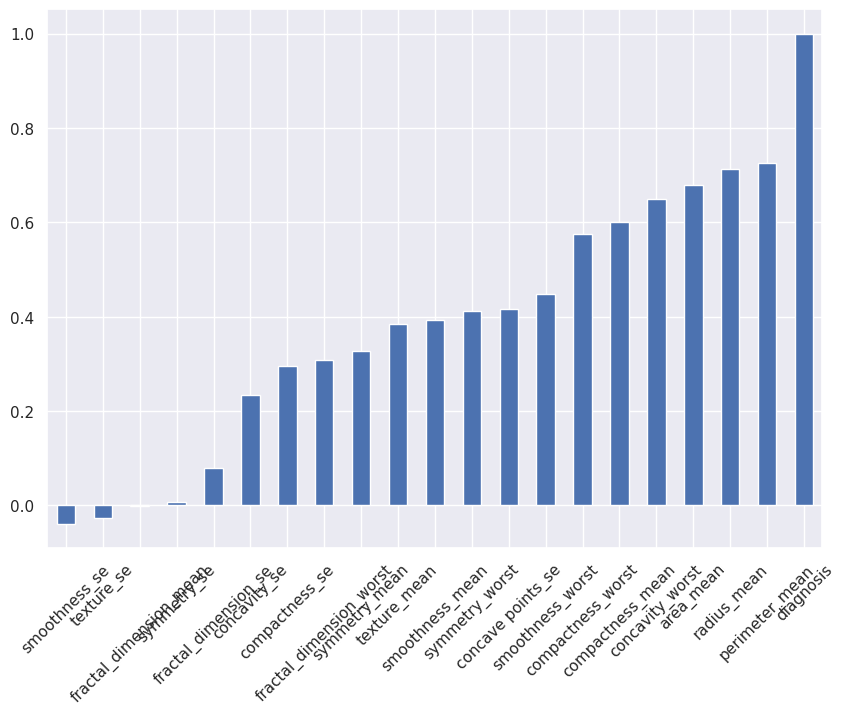

In [ ]:
fig = plt.figure(figsize=(10,7))
df_dea.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_dea = X_over
df_dea["diagnosis"]=y_over

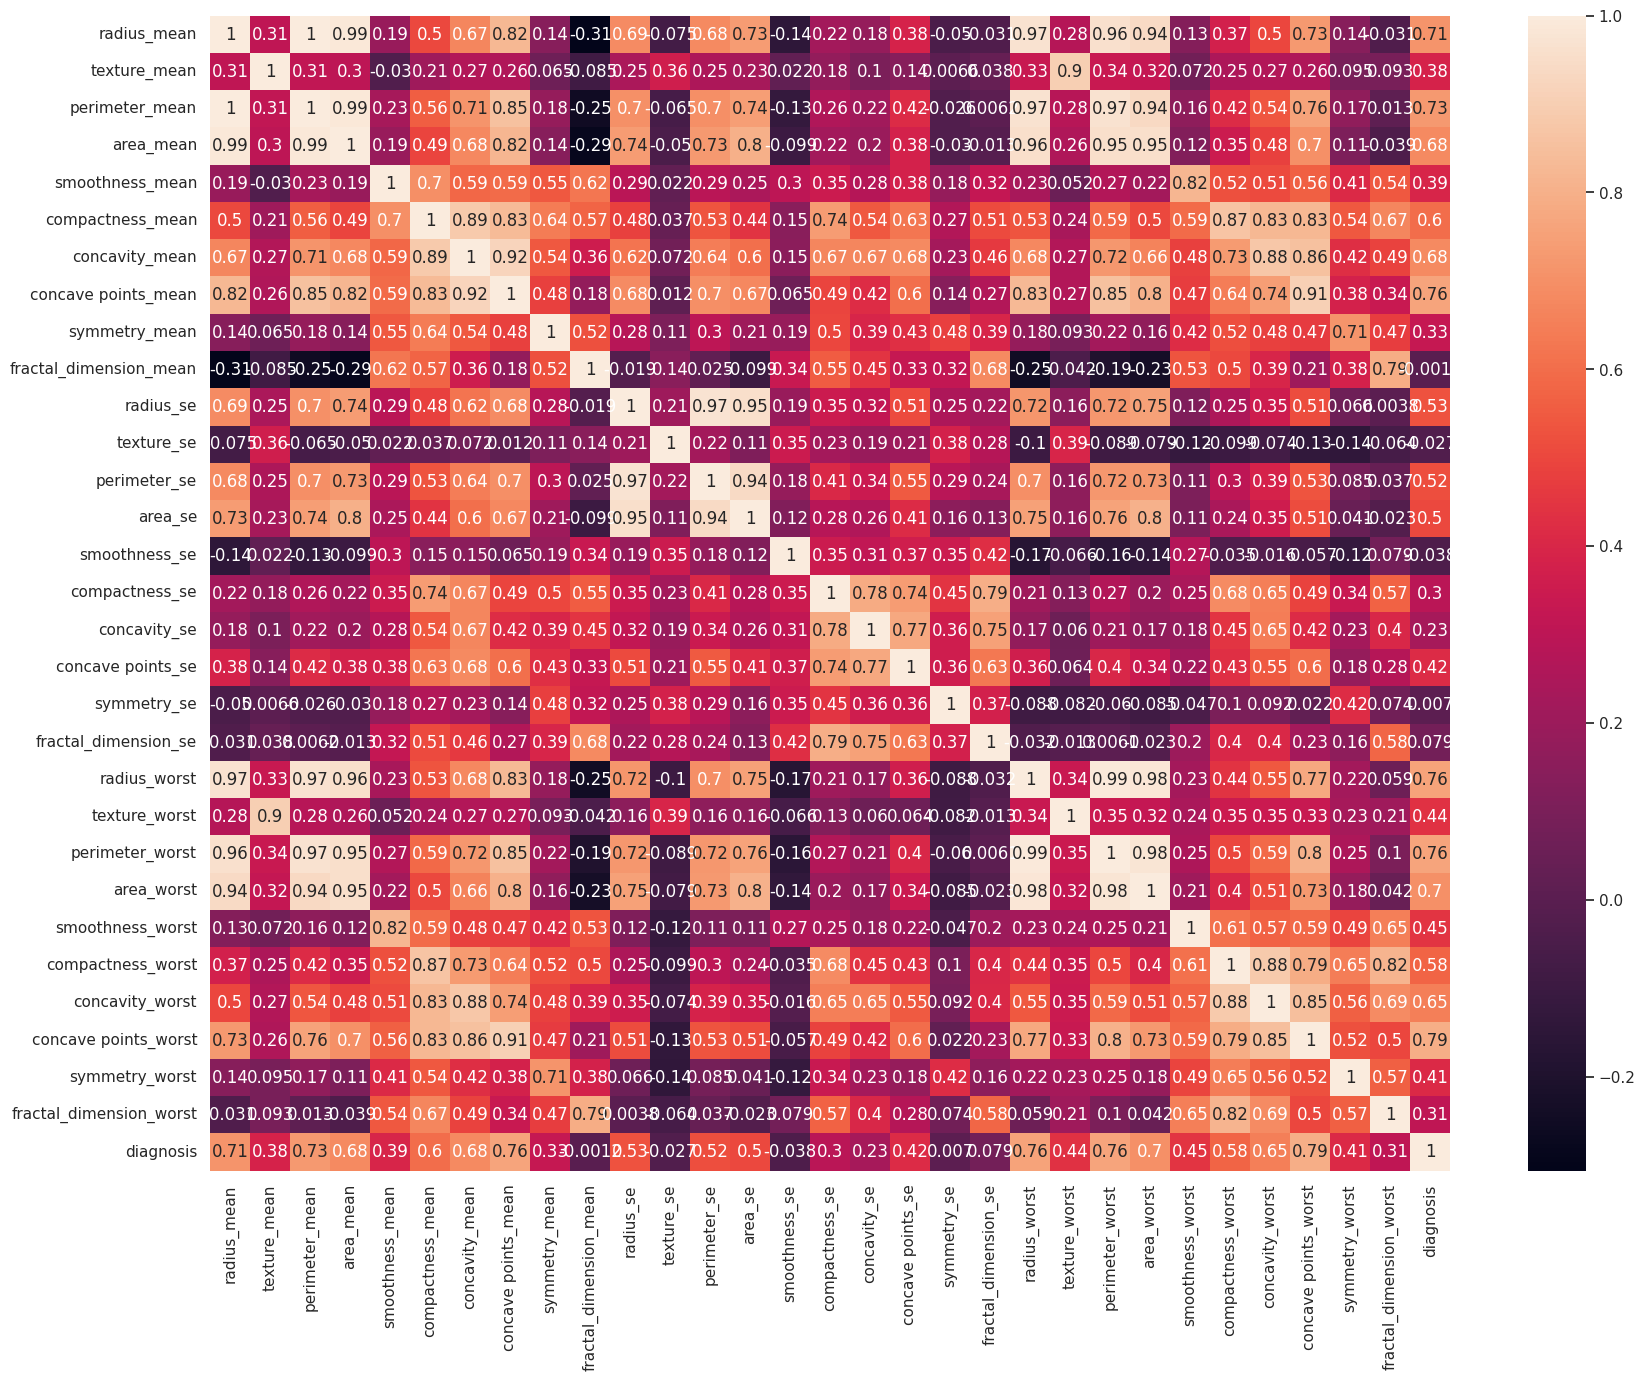

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df_dea.corr(),annot=True)
plt.show()

we then proceed to discard those variables that presents high colinearity, i.e., exhibits high correlation among them.

In [ ]:
df_dea.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'diagnosis'],
      dtype='object')

In [ ]:
corr_matrix = df_dea.corr()

high_correlation_variables = set()

for col in corr_matrix.columns:
  correlated_cols = corr_matrix.loc[corr_matrix[col] > 0.9, col].index
  high_correlation_variables.update(set(correlated_cols)-set([col]))

#we specify based on our knowledge of the problem, which columns we want to preserve.
col_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
col_indices = [(df.columns.get_loc(column_name))-1 for column_name in col_names]

preserve_cols = set(df_dea.columns[i] for i in col_indices)
high_correlation_variables = high_correlation_variables - preserve_cols

new_df_dea = df_dea.drop(columns=list(high_correlation_variables))

In [ ]:
print(col_indices)

[0, 1, 2, 3]


In [ ]:
new_df_dea.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,14.060,17.18,89.75,609.1,0.08045,0.05361,0.1641,0.05764,1.6850,0.005371,...,0.011320,0.009155,0.01719,0.001444,0.10660,0.12310,0.08460,0.2523,0.06609,0
1,9.777,16.99,62.50,290.2,0.10370,0.08404,0.1584,0.07065,1.4240,0.013850,...,0.027220,0.010230,0.03281,0.004638,0.14670,0.17650,0.13000,0.2533,0.08468,0
2,13.900,19.24,88.73,602.9,0.07991,0.05326,0.1579,0.05594,0.9264,0.003704,...,0.015300,0.006275,0.01062,0.002217,0.10640,0.14150,0.16730,0.2356,0.07603,0
3,12.460,12.83,78.83,477.3,0.07372,0.04043,0.1613,0.06013,1.4860,0.010390,...,0.006416,0.007895,0.02869,0.004821,0.09439,0.06477,0.01674,0.2280,0.07028,0
4,11.710,16.67,74.72,423.6,0.10510,0.06095,0.1339,0.05945,2.5080,0.006578,...,0.026620,0.013070,0.01359,0.003707,0.12710,0.10280,0.10460,0.1712,0.07343,0


In [ ]:
new_df_dea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              424 non-null    float64
 1   texture_mean             424 non-null    float64
 2   perimeter_mean           424 non-null    float64
 3   area_mean                424 non-null    float64
 4   smoothness_mean          424 non-null    float64
 5   compactness_mean         424 non-null    float64
 6   symmetry_mean            424 non-null    float64
 7   fractal_dimension_mean   424 non-null    float64
 8   texture_se               424 non-null    float64
 9   smoothness_se            424 non-null    float64
 10  compactness_se           424 non-null    float64
 11  concavity_se             424 non-null    float64
 12  concave points_se        424 non-null    float64
 13  symmetry_se              424 non-null    float64
 14  fractal_dimension_se     4

In [ ]:
X_over.drop(columns=list(high_correlation_variables), axis=1, inplace=True)

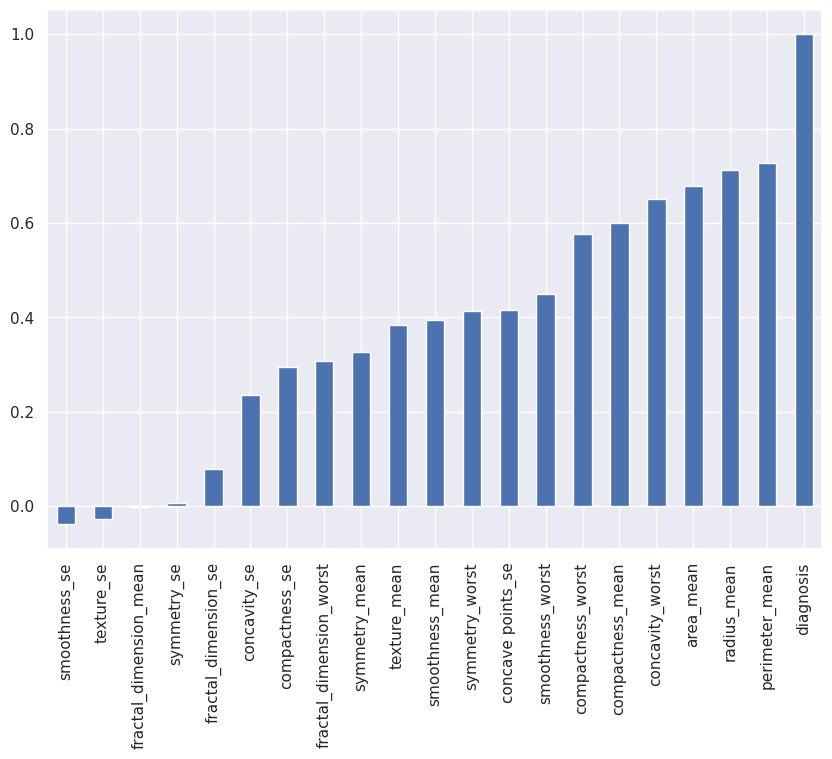

In [ ]:
fig = plt.figure(figsize=(10,7))
new_df_dea.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

###4.2-Data Visualization

In [ ]:
sns.pairplot(new_df_dea, hue='diagnosis')

Output hidden; open in https://colab.research.google.com to view.

##5)-Scalability and data spliting

In [ ]:
X_over.drop('diagnosis',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size=0.2)

In [ ]:
st_x = StandardScaler()
X_train_scaled = st_x.fit_transform(X_train) 
X_test_scaled = st_x.transform(X_test)

##6)-Model Training

In [ ]:
def logistic_model(C_,solver_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class='ovr', n_jobs=-1, C=C_ )
    return logistic_regression_model

In [ ]:
model = logistic_model(1,'saga')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[44  2]
 [ 1 38]]
0.9647058823529412


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,prediction_test))

0.9647058823529412


But despite the high performance, we are going to check which of the solver methods performs better having a regularization parameter of C=1.

In [ ]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores=[]
params=[]

for i in solver_list:
  try:
    model = logistic_model(1,i)
    model.fit(X_train_scaled,y_train)
    predictions = model.predict(X_test_scaled)
    params.append(i + '-')
    accuracy = accuracy_score(y_test,predictions)
    scores.append(accuracy)
  except:
    None

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##7)-Analisis of results

In [ ]:
model.predict_proba(X_test_scaled)

array([[9.98460682e-01, 1.53931820e-03],
       [1.86952856e-02, 9.81304714e-01],
       [9.98224405e-01, 1.77559537e-03],
       [1.05094652e-03, 9.98949053e-01],
       [3.98916766e-05, 9.99960108e-01],
       [9.98591083e-01, 1.40891698e-03],
       [6.68111841e-01, 3.31888159e-01],
       [9.99314092e-01, 6.85908230e-04],
       [9.98030687e-01, 1.96931321e-03],
       [9.00797574e-01, 9.92024264e-02],
       [9.98037076e-01, 1.96292408e-03],
       [9.06811922e-01, 9.31880784e-02],
       [2.05933918e-02, 9.79406608e-01],
       [9.87635809e-01, 1.23641912e-02],
       [6.33051993e-05, 9.99936695e-01],
       [3.59174863e-04, 9.99640825e-01],
       [9.04395595e-01, 9.56044050e-02],
       [1.45651897e-01, 8.54348103e-01],
       [9.92106788e-01, 7.89321209e-03],
       [2.93938112e-02, 9.70606189e-01],
       [9.02799775e-01, 9.72002246e-02],
       [1.18526664e-04, 9.99881473e-01],
       [1.49196904e-05, 9.99985080e-01],
       [1.24787132e-01, 8.75212868e-01],
       [9.876479

In [ ]:
model.coef_

array([[ 0.59007385,  0.48077993,  0.58070214,  0.55044861,  0.23501983,
         0.16384951,  0.03493109, -0.20914471,  0.25076111, -0.06654537,
        -0.21545879, -0.02275782,  0.3808291 , -0.16849006, -0.25104405,
         0.32329176,  0.19614004,  0.45392792,  0.33562923,  0.13272119,
         3.15416993]])

In [ ]:
X_over.columns.values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'liblinear-'),
  Text(1, 0, 'newton-cg-'),
  Text(2, 0, 'lbfgs-'),
  Text(3, 0, 'sag-'),
  Text(4, 0, 'saga-')])

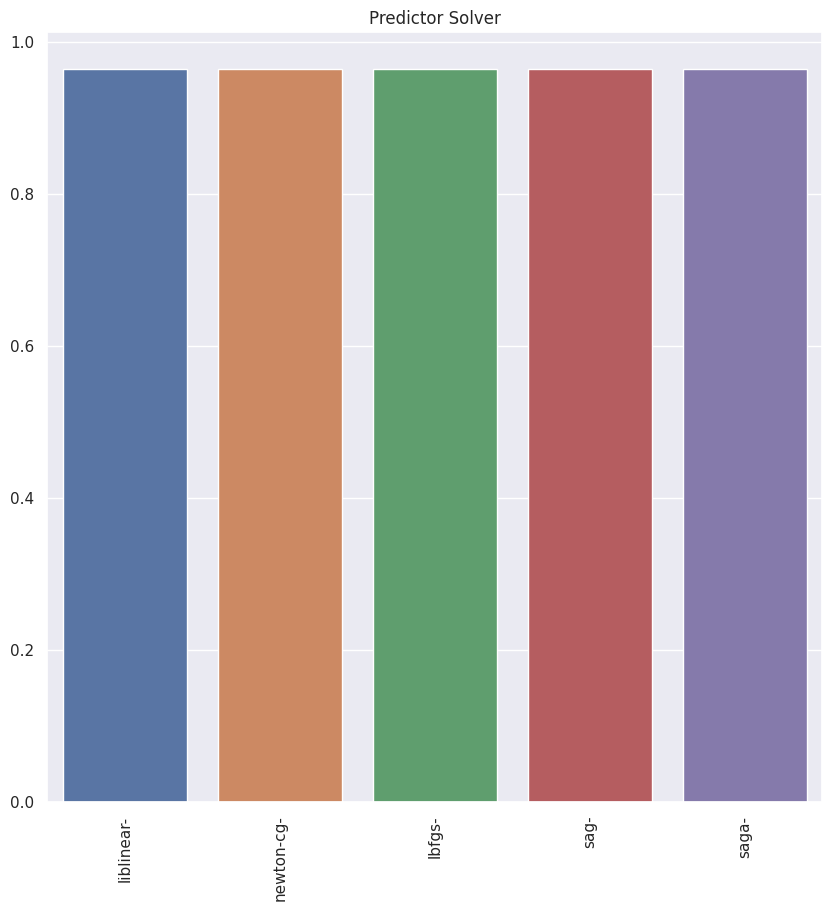

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title('Predictor Solver')
plt.xticks(rotation=90)

In [ ]:
model = logistic_model(1,'newton-cg')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[44  2]
 [ 1 38]]
0.9647058823529412


Axes(0.125,0.11;0.775x0.77)


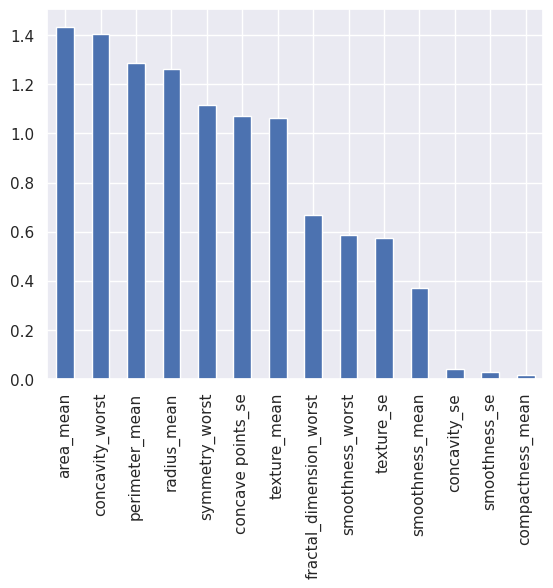

In [ ]:
weights = pd.Series(model.coef_[0],
                    index=X_over.columns.values) 
print(weights.sort_values(ascending=False)[:14].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


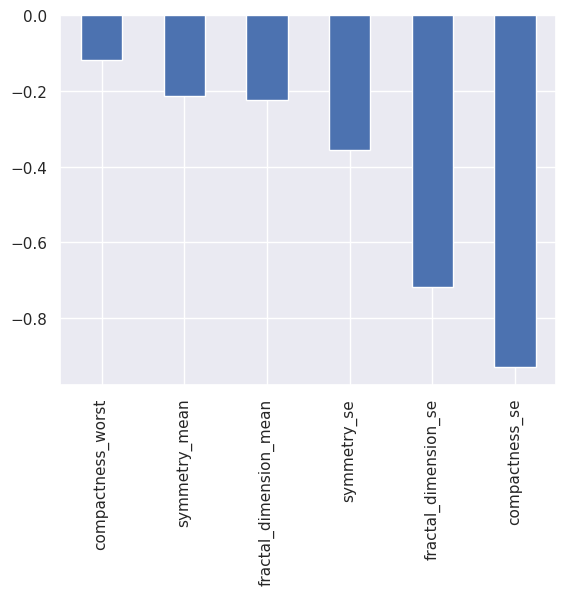

In [ ]:
print(weights.sort_values(ascending=False)[-6:].plot(kind='bar'))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

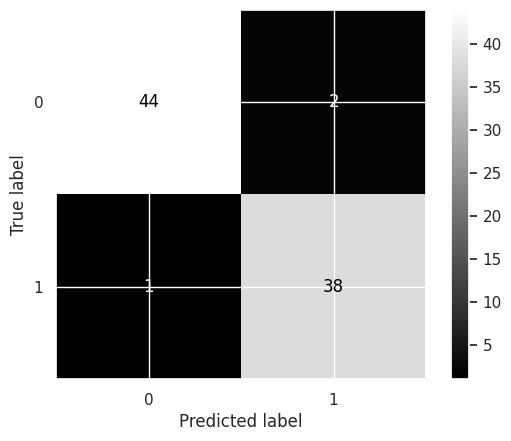

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()